### Imports

In [46]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
airbnb = pd.read_csv("../Data/Airbnb_data.csv",parse_dates=["first_review", "last_review", "host_since", "calendar_last_scraped"])

C:\Users\Felix\AppData\Local\Temp\ipykernel_7336\2169726969.py:1: DtypeWarning:

Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.



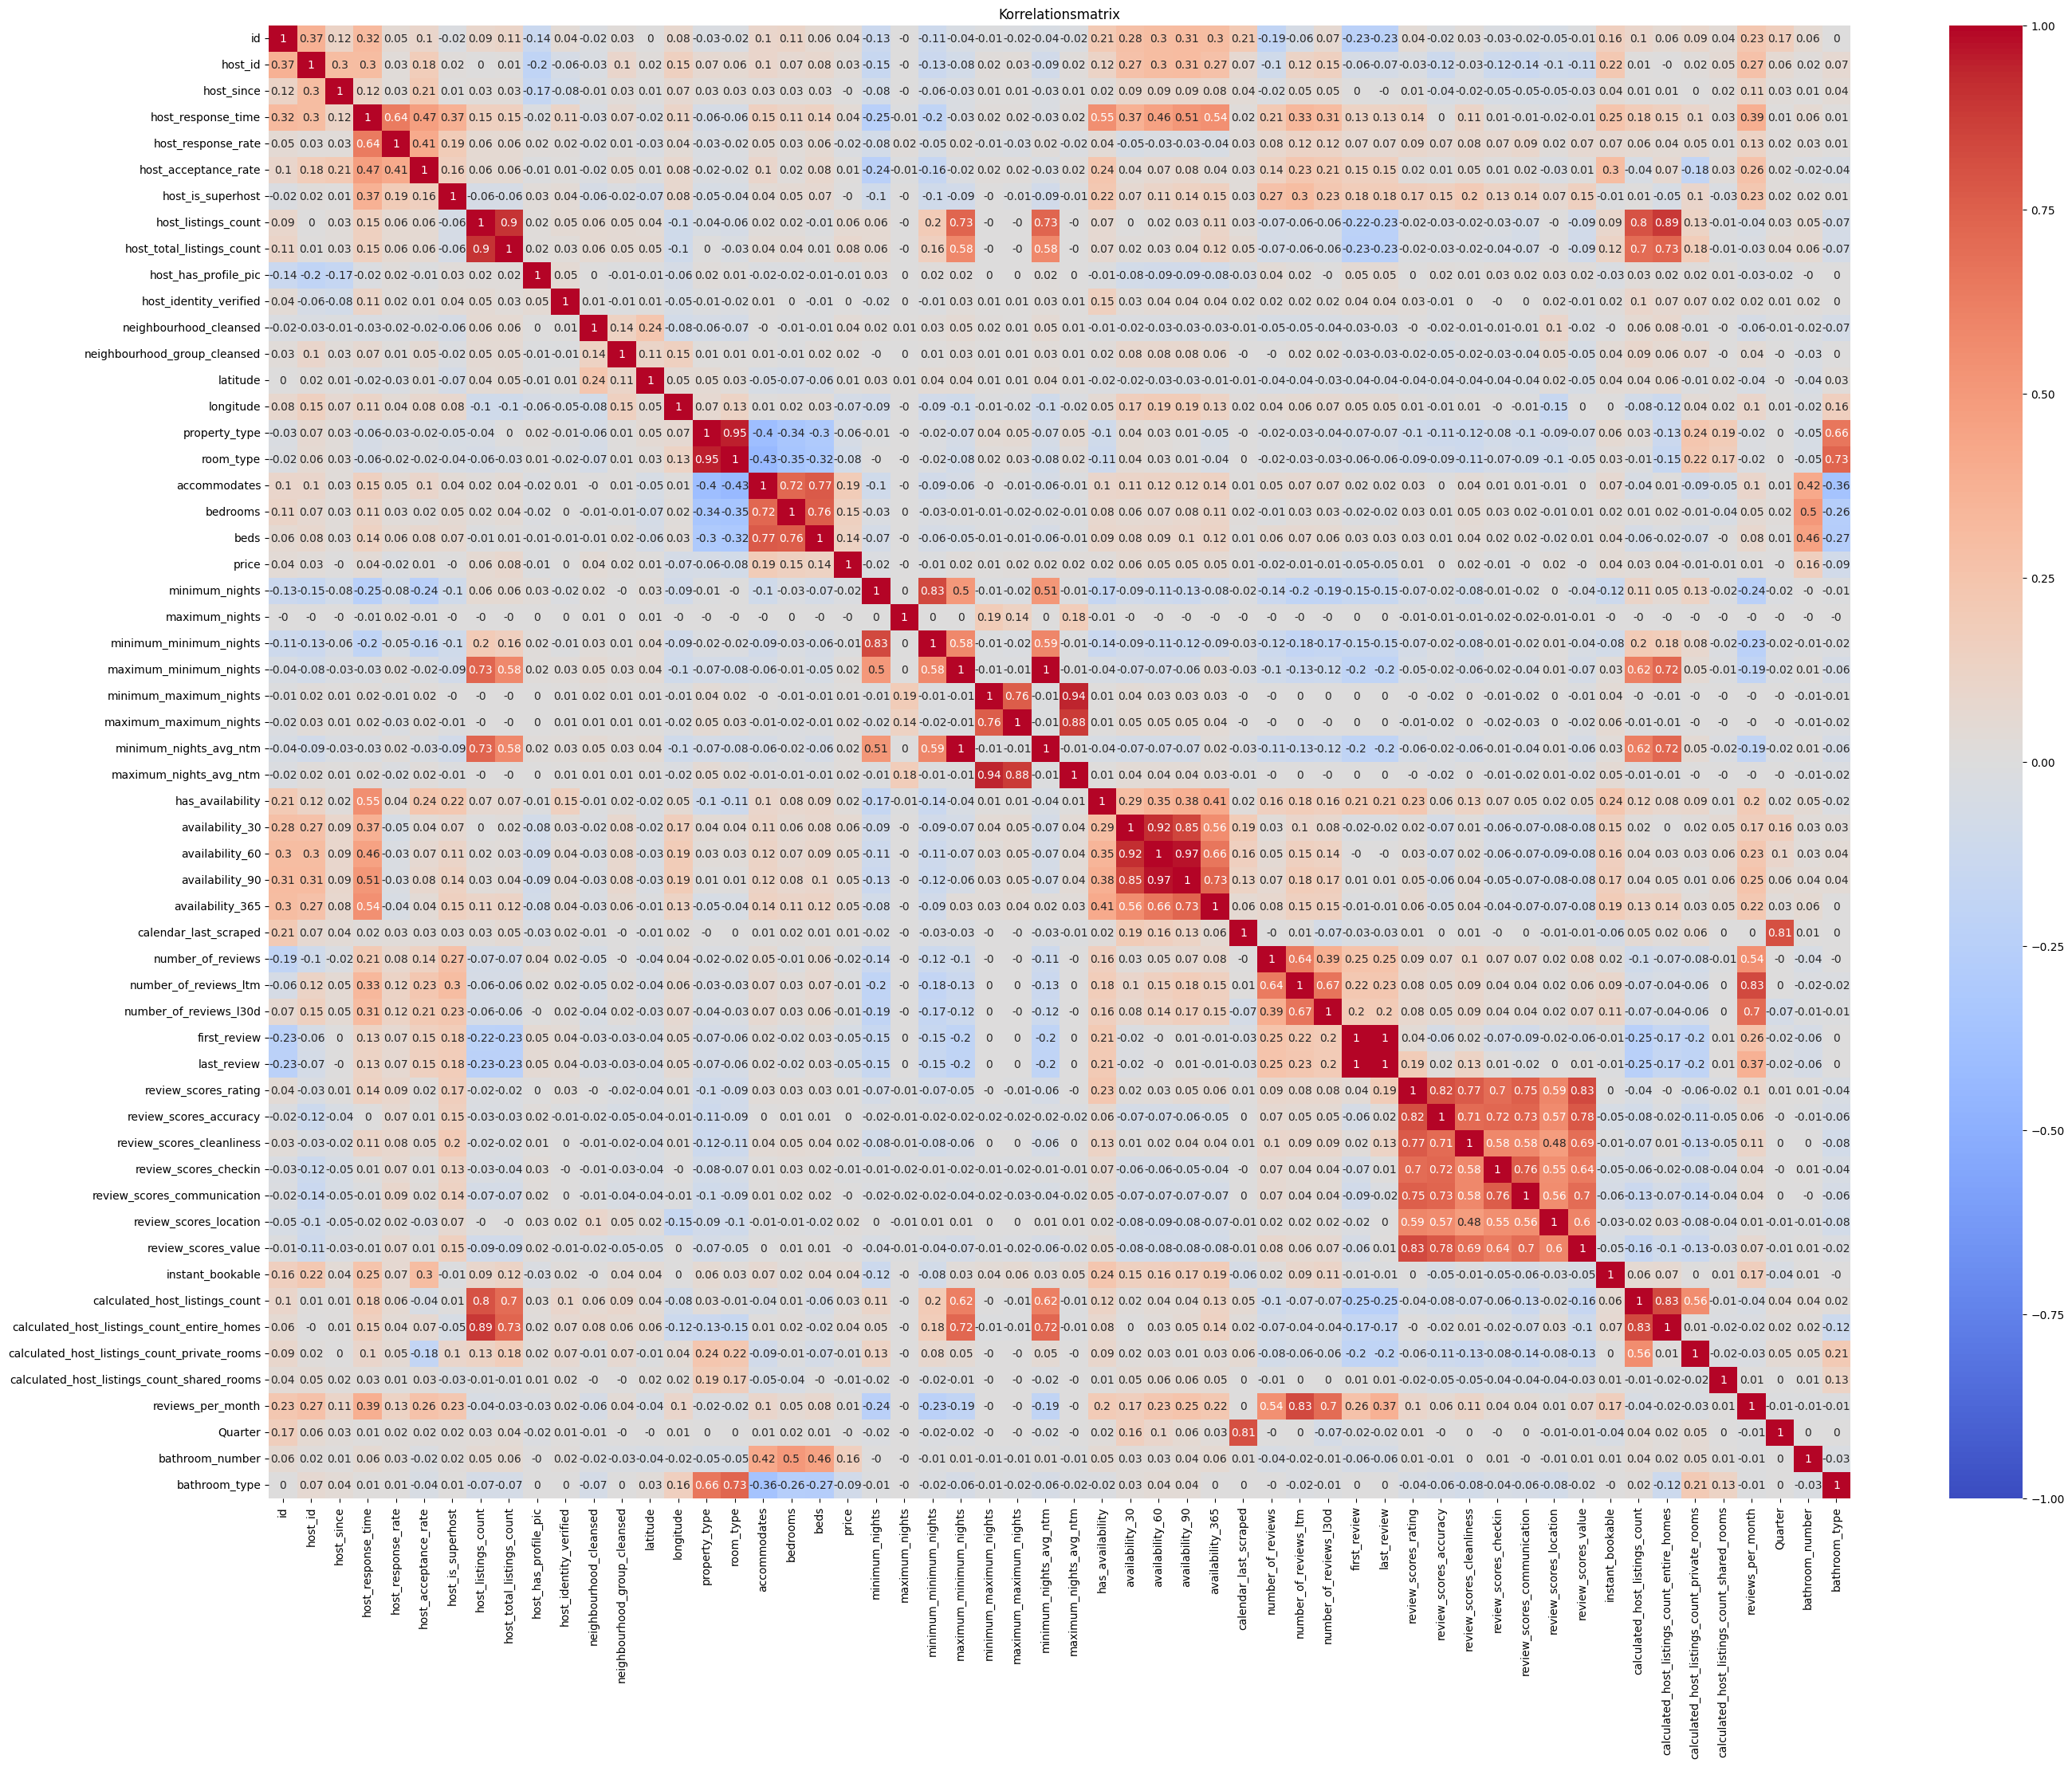

In [48]:
# Korrelationsmatrix berechnen
corr_matrix = airbnb.corr(method='pearson').round(2)

# Korrelationsmatrix visualisieren
plt.figure(figsize=(32, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelationsmatrix')
plt.savefig("../Data/Correlation_matrix.png")
plt.show()


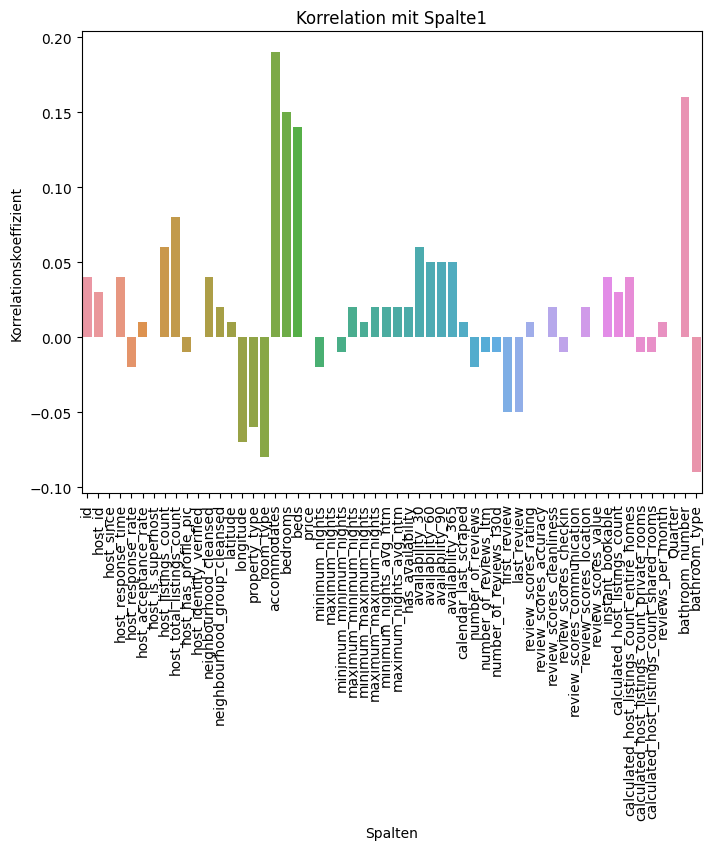

In [49]:
# Korrelationsmatrix berechnen
corr_price = corr_matrix["price"]
corr_price["price"]  = np.nan

# Korrelation visualisieren
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=corr_price.index, y=corr_price.values)
plt.title('Korrelation mit Spalte1')
plt.xlabel('Spalten')
plt.ylabel('Korrelationskoeffizient')

# Labels auf der x-Achse um 90 Grad drehen
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

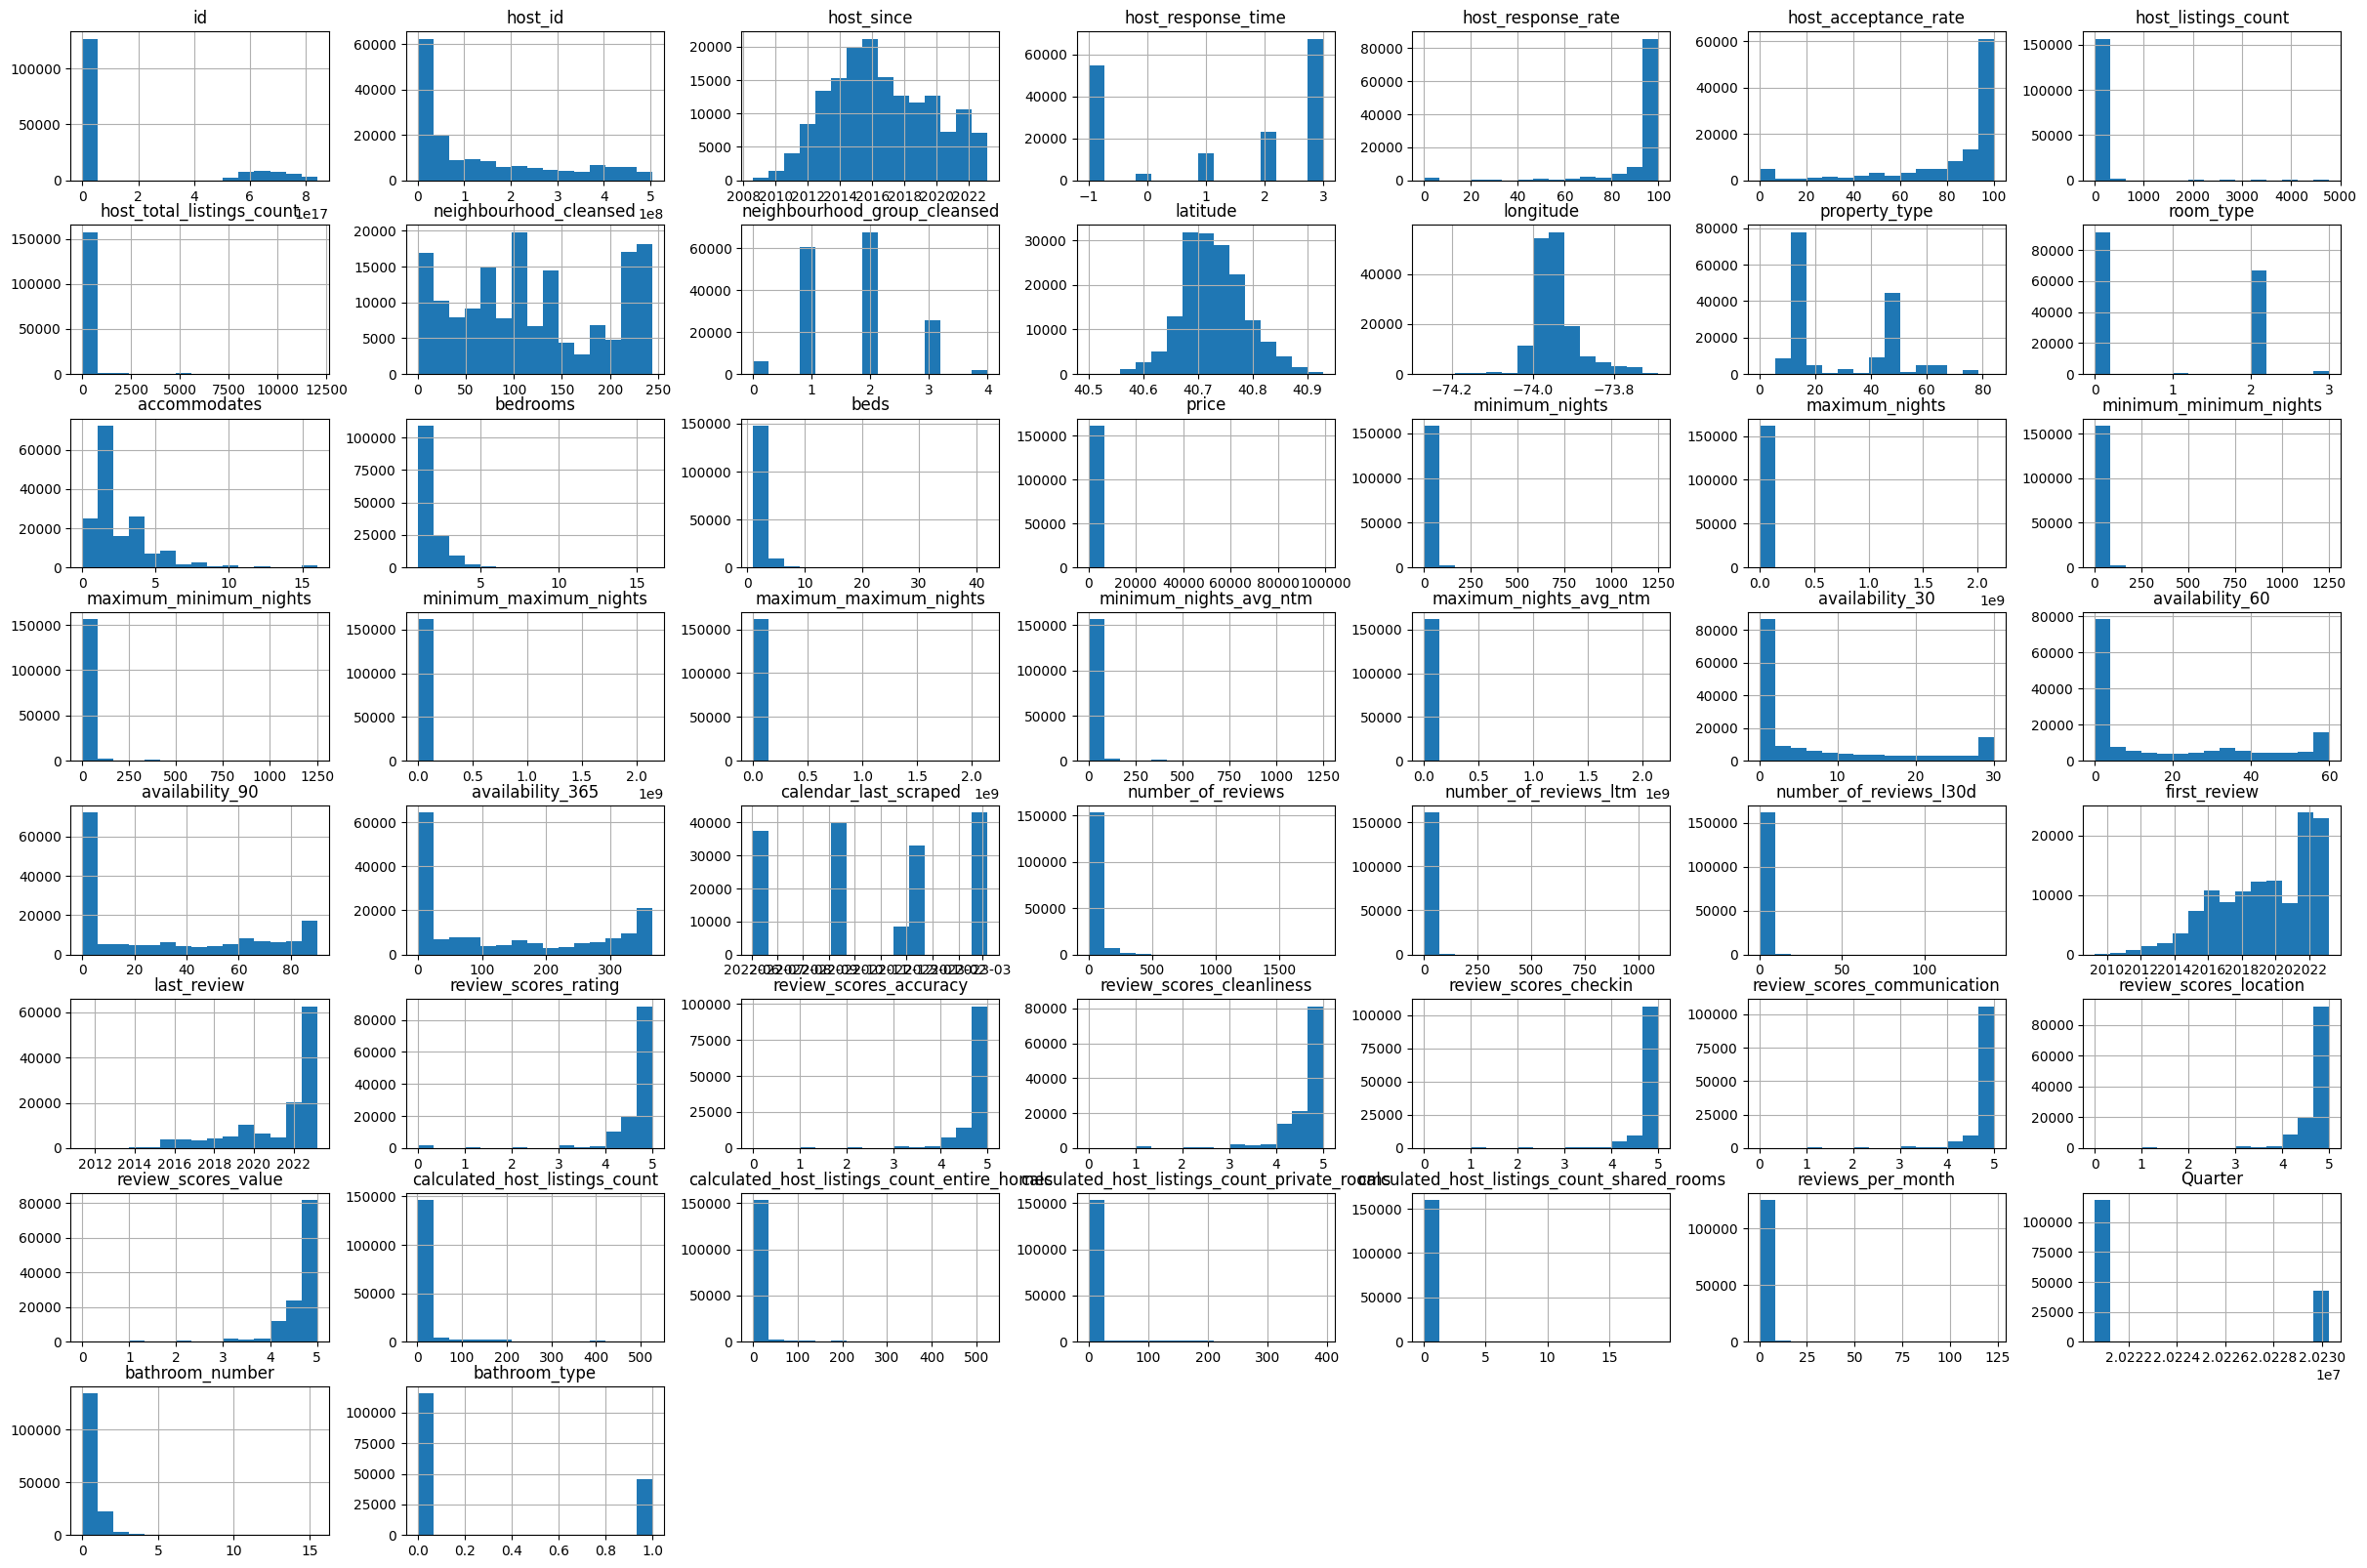

In [50]:
airbnb.hist(bins=15, figsize=(30,20));
     


In [53]:
# Calculating the average price per region
price_region = round(airbnb.groupby('neighbourhood_group_cleansed').price.mean().sort_values(ascending=False), 2)

# Displaying the results
print(price_region)
print('\n')

# Plotting the average price per region
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

ax = sns.barplot(price_region.index, price_region, palette=sns.xkcd_palette(colors)) 
ax.set_title('Average Price per Region')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

neighbourhood_group_cleansed
2    273.45
4    228.53
1    161.12
0    136.47
3    129.99
Name: price, dtype: float64




TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given